In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [107]:
train = pd.read_csv(r'C:\Users\santh\Desktop\Python_Projects\train.csv')
test = pd.read_csv(r'C:\Users\santh\Desktop\Python_Projects\test.csv')

In [108]:
train
test

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...
...,...,...,...,...
5195,25995,The Bangladeshi Traffic Jam That Never Ends - ...,Jody Rosen,Of all the dysfunctions that plague the world’...
5196,25996,John Kasich Signs One Abortion Bill in Ohio bu...,Sheryl Gay Stolberg,WASHINGTON — Gov. John Kasich of Ohio on Tu...
5197,25997,"California Today: What, Exactly, Is in Your Su...",Mike McPhate,Good morning. (Want to get California Today by...
5198,25998,300 US Marines To Be Deployed To Russian Borde...,NaN,« Previous - Next » 300 US Marines To Be Deplo...


In [109]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [110]:
train.shape

(20800, 5)

In [111]:
#checking for any empty values in the dataset
train.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [113]:
#removing the empty field rows
train.dropna(axis = 0, inplace = True)
test.dropna(axis = 0, inplace = True)
test.isna().sum()

id        0
title     0
author    0
text      0
dtype: int64

In [114]:
test.isna().sum().shape

(4,)

In [115]:
#to get the continuous indices
train.reset_index(inplace = True)
train

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...,...
18280,20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
18281,20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
18282,20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
18283,20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


<Axes: xlabel='label', ylabel='count'>

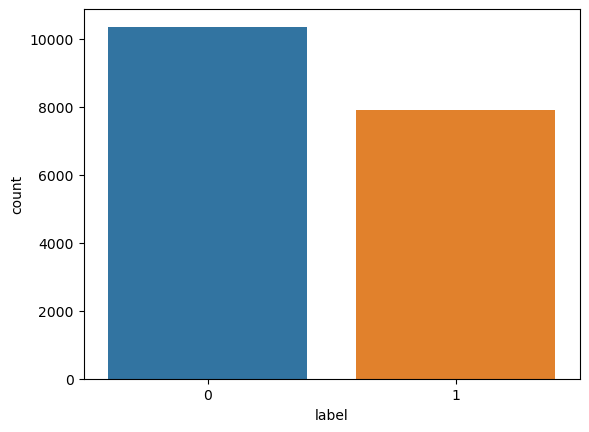

In [116]:
#To check balanced or unbalanced data
sns.countplot(x = train['label'])

In [117]:
data = train['title'][0]
data

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [26]:
#Preprocessing the data to remove all the special characters from the title field of 1 row
# import regular expressions  first
import re
data = re.sub('[^a-zA-Z]',' ',data)
data = data.lower()
data

'house dem aide  we didn t even see comey s letter until jason chaffetz tweeted it'

In [27]:
#split the text into words to remove the stopwords and the stemming
list = data.split()

In [29]:
list

['house',
 'dem',
 'aide',
 'we',
 'didn',
 't',
 'even',
 'see',
 'comey',
 's',
 'letter',
 'until',
 'jason',
 'chaffetz',
 'tweeted',
 'it']

In [30]:
#To remove the stopwords
!pip install nltk

In [32]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\santh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [36]:
#To filter the list such that it only contains the stemmed words and non-stopwords
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [37]:
#create an object of PorterStemmer
ps = PorterStemmer()
review = [ps.stem(word) for word in list if word not in set(stopwords.words('english'))]
review

['hous',
 'dem',
 'aid',
 'even',
 'see',
 'comey',
 'letter',
 'jason',
 'chaffetz',
 'tweet']

In [39]:
#Now we have to join the words in the list
review = ' '.join(review)
review

'hous dem aid even see comey letter jason chaffetz tweet'

In [75]:
# Now we have done the preprocessing only for the first row of the training dataset title field.we will do for the remaining fields
#Let us create an empty list
corpus_train = []
for i in range(0,len(train)):
    review  = re.sub('[^a-zA-Z]',' ',train['title'][i])
    review = review.lower()
    list = review.split()
    review = [ps.stem(word)  for word in list if  not word  in set(stopwords.words('english'))]
    corpus_train.append(' '.join(review))

In [71]:
#bag of words model i.e converting the text ot the vectors 
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [118]:
X = cv.fit_transform(corpus_train).toarray()
X.shape

(18285, 13913)

In [119]:
y = dataset_train['label']
y.shape

(18285,)

In [103]:
#splitting the training data into testing and training data
from sklearn.model_selection import train_test_split
X_train,X_test , y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 0)
X_train.shape

(13713, 13913)

In [104]:
#using the MultinomialNB algorithm
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train,y_train)

MultinomialNB()

In [120]:
Y_pred = classifier.predict(X_test)

In [121]:
Y_pred

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

array([[2427,  156],
       [ 290, 1699]], dtype=int64)

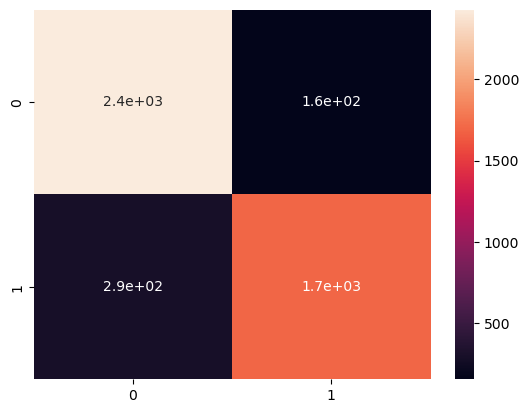

In [123]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,Y_pred)
sns.heatmap(cm,annot = True)
cm

In [124]:
accuracy_score(y_test, Y_pred)

0.9024496937882764